# 獲得ユーザーの質に差がある？

- 「仕事ではじめる機械学習」(オライリー・ジャパン発行 ISBN978-4-87311-825-3)
- p113- 6章 効果検証 6.2節 仮説検定の仕組み

In [1]:
# ライブラリの読み込み
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
#import pandas as pd

In [2]:
# 0から1まで等間隔の200個の数列
x = np.linspace(0, 1, 200, endpoint = False)

In [3]:
# 二項分布の正規近似
def bin_pdf(a1, a2):
    n = a1 + a2
    p = a1 / n
    std = np.sqrt(p * (1 - p) / n)
    y = scipy.stats.norm.pdf(x, p, std)
    return y

In [4]:
# 流入経路別ユーザーの継続/解約数
a = [40, 165] # 205人中45人が継続、165人が解約
b = [62, 228] # 290人中62人が継続、228人が解約

In [5]:
# 継続化率の推定値
y_a = bin_pdf(*a)
y_b = bin_pdf(*b)

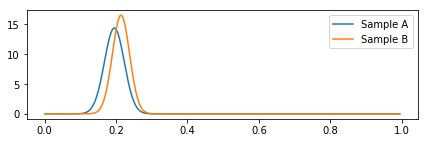

In [6]:
# 可視化
plt.figure(figsize=(7, 2))
plt.plot(x, y_a, label='Sample A')
plt.plot(x, y_b, label='Sample B')
plt.legend()

Bの方が良さそうに見えるが、信頼区間の幅がほぼ重複しているので微妙なところ

In [7]:
# カイ二乗検定で独立性検定を行う
_, p_value, _, _ = scipy.stats.chi2_contingency([a, b])
print(p_value)

0.694254736449269


p値0.69 > 有意水準0.05 なので帰無仮説「A,B2つの母集団で継続化率は等しい」は棄却できない。「たまたまです」